### Recognize digits pattern in loaded images with Keras

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
digit_name = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

In [3]:
#Shape of Dataset
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


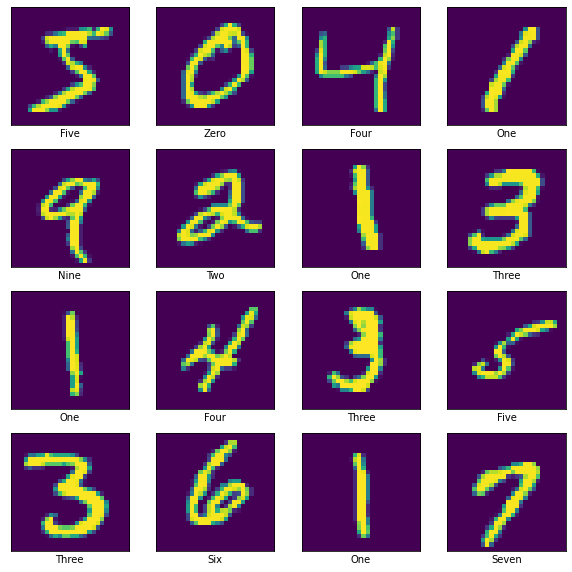

In [4]:
# EDA
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])
    plt.xlabel(digit_name[y_train[i]])

## Neural Network

In [5]:
import numpy
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.utils import np_utils

In [6]:
# flatten 28*28 images to a 1*784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2] 
print(num_pixels)

784


In [7]:
#Flattening numpy array 28*28 to 784
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [8]:
X_train.shape

(60000, 784)

In [9]:
# Normalize inputs
X_train = X_train / 255.
X_test = X_test / 255.

In [10]:
# One Hot Encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [11]:
X_train[0].shape

(784,)

In [12]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
# Model: input:[1x784], layer1: 256 perceptrons: Relu, layer2: 256 perceptrons: Relu, layer3:10 perceptrons:Softmax

# Design and Create Model
def base_models():
    model = Sequential()
    model.add(Dense(256, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Flatten())
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
# Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Build the Model
model = base_models()

# Fit the Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=14, batch_size=200, verbose=2)

# Final Evaluation of the Model
scores = model.evaluate(X_test, y_test, verbose=0)

#print(scores)
print("Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/14
300/300 - 5s - loss: 0.3369 - accuracy: 0.9054 - val_loss: 0.1541 - val_accuracy: 0.9548
Epoch 2/14
300/300 - 3s - loss: 0.1263 - accuracy: 0.9621 - val_loss: 0.1123 - val_accuracy: 0.9662
Epoch 3/14
300/300 - 3s - loss: 0.0824 - accuracy: 0.9752 - val_loss: 0.0836 - val_accuracy: 0.9740
Epoch 4/14
300/300 - 3s - loss: 0.0598 - accuracy: 0.9814 - val_loss: 0.0767 - val_accuracy: 0.9761
Epoch 5/14
300/300 - 3s - loss: 0.0423 - accuracy: 0.9867 - val_loss: 0.0689 - val_accuracy: 0.9801
Epoch 6/14
300/300 - 3s - loss: 0.0331 - accuracy: 0.9895 - val_loss: 0.0756 - val_accuracy: 0.9776
Epoch 7/14
300/300 - 3s - loss: 0.0266 - accuracy: 0.9915 - val_loss: 0.0767 - val_accuracy: 0.9767
Epoch 8/14
300/300 - 3s - loss: 0.0206 - accuracy: 0.9937 - val_loss: 0.0711 - val_accuracy: 0.9805
Epoch 9/14
300/300 - 3s - loss: 0.0160 - accuracy: 0.9951 - val_loss: 0.0729 - val_accuracy: 0.9795
Epoch 10/14
300/300 - 3s - loss: 0.0136 - accuracy: 0.9958 - val_loss: 0.0748 - val_accuracy: 0.9816

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


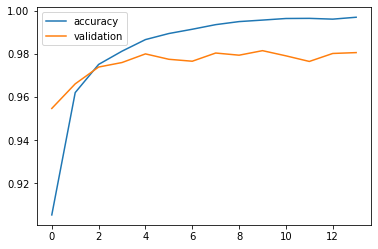

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()

In [19]:
loss,acc = model.evaluate(X_test, y_test, verbose=0)
print(loss,acc)

0.07910257577896118 0.9807000160217285


In [20]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
def predict(desired_img):
    
    X_t = desired_img.reshape(1, num_pixels).astype('float32')
    pred_category = digit_name[np.argmax(model.predict(X_t))]
    
    return pred_category

'Seven'

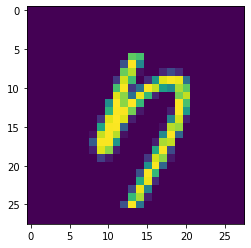

In [21]:
import random as rnd
import numpy as np
rnd_int = rnd.randint(0, X_train.shape[0])
plt.imshow(X_train[rnd_int])
predict(X_train[rnd_int])

In [22]:
x= X_train[0]
type(x)
x.shape

(28, 28)

'Five'

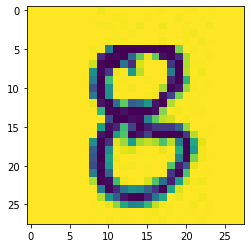

In [23]:
#1. Correct: loading image from local memory. 
img = plt.imread('images.jpg')
img = img[:, :, 0]
plt.imshow(img)
#plt.imshow(img)
predict(img)

'Seven'

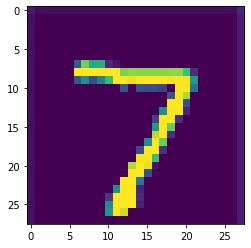

In [24]:
#2. Correct: loading image from local memory. 
img = plt.imread('sample_image.png')
img = img[:, :, 0]
plt.imshow(img)
#plt.imshow(img)
predict(img)

'Six'

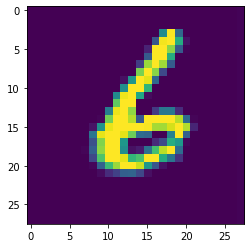

In [25]:
#3. Correct: loading image from local memory. 
img = plt.imread('RdEpj.png')
img = img[:, :, 0]
plt.imshow(img)
#plt.imshow(img)
predict(img)